In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
circuits = pd.read_csv('circuits.csv')
drivers = pd.read_csv('drivers.csv')
driver_standings = pd.read_csv('driver_standings.csv')
races = pd.read_csv('races.csv')
results = pd.read_csv('results.csv')
status = pd.read_csv('status.csv')

# Czyszczenie danych

In [4]:
    drivers.drop(columns=['url', 'code'], inplace=True)
    results.drop(columns=['fastestLap', 'constructorId', 'rank', 'fastestLapTime', 'fastestLapSpeed'], inplace=True)
    # Łączenie plików
    results = results.merge(drivers[['driverId', 'surname', 'forename','dob', 'nationality']], on='driverId')
    results = results.merge(status, on='statusId')

    results.to_csv('results.csv', index=False) # Zapisanie do pliku

In [5]:
    circuits.drop(columns=['url', 'location', 'circuitRef', 'country', 'lat', 'lng', 'alt'], inplace=True)
    races.drop(columns=['url', 'time', 'fp1_date', 'fp1_time','fp2_date','fp2_time','fp3_date','fp3_time','quali_date','quali_time','sprint_date','sprint_time'], inplace=True)
    races = races.merge(circuits[['circuitId', 'name']], on='circuitId', how='left', suffixes=('_race', '_circuit'))
    races = races[['raceId', 'year', 'round', 'name_race', 'date', 'circuitId', 'name_circuit']]
    
    races.to_csv('races.csv', index=False)

# EDA - podstawowe statystyki

In [6]:
results

,resultId,raceId,driverId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,statusId,surname,forename,dob,nationality,status
0,1,18,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,1,Hamilton,Lewis,1985-01-07,British,Finished
1,27,19,1,22,9,5,5,5,4.0,56,+46.548,5525103,1,Hamilton,Lewis,1985-01-07,British,Finished
2,69,21,1,22,5,3,3,3,6.0,66,+4.187,5903238,1,Hamilton,Lewis,1985-01-07,British,Finished
3,90,22,1,22,3,2,2,2,8.0,58,+3.779,5213230,1,Hamilton,Lewis,1985-01-07,British,Finished
4,109,23,1,22,3,1,1,1,10.0,76,2:00:42.742,7242742,1,Hamilton,Lewis,1985-01-07,British,Finished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,24883,1043,825,20,17,\N,R,18,0.0,47,\N,\N,139,Magnussen,Kevin,1992-10-05,Danish,Illness
25836,25405,1073,853,9,20,\N,W,20,0.0,0,\N,\N,139,Mazepin,Nikita,1999-03-02,Russian,Illness
25837,24764,1037,847,63,15,\N,R,19,0.0,9,\N,\N,138,Russell,George,1998-02-15,British,Debris
25838,25624,1084,849,6,17,\N,R,19,0.0,48,\N,\N,140,Latifi,Nicholas,1995-06-29,Canadian,Undertray


In [7]:
print(results.head())

   resultId  raceId  driverId number  grid position positionText  \
0         1      18         1     22     1        1            1   
1        27      19         1     22     9        5            5   
2        69      21         1     22     5        3            3   
3        90      22         1     22     3        2            2   
4       109      23         1     22     3        1            1   

   positionOrder  points  laps         time milliseconds  statusId   surname  \
0              1    10.0    58  1:34:50.616      5690616         1  Hamilton   
1              5     4.0    56      +46.548      5525103         1  Hamilton   
2              3     6.0    66       +4.187      5903238         1  Hamilton   
3              2     8.0    58       +3.779      5213230         1  Hamilton   
4              1    10.0    76  2:00:42.742      7242742         1  Hamilton   

  forename         dob nationality    status  
0    Lewis  1985-01-07     British  Finished  
1    Lewis  1985

In [8]:
driver_standings

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0
...,...,...,...,...,...,...,...
33897,71841,1098,840,0.0,16,16,0
33898,71842,1098,852,0.0,17,17,0
33899,71843,1098,830,0.0,18,18,0
33900,71844,1098,856,0.0,19,19,0


In [9]:
races

,raceId,year,round,name_race,date,circuitId,name_circuit
0,1,2009,1,Australian Grand Prix,2009-03-29,1,Albert Park Grand Prix Circuit
1,2,2009,2,Malaysian Grand Prix,2009-04-05,2,Sepang International Circuit
2,3,2009,3,Chinese Grand Prix,2009-04-19,17,Shanghai International Circuit
3,4,2009,4,Bahrain Grand Prix,2009-04-26,3,Bahrain International Circuit
4,5,2009,5,Spanish Grand Prix,2009-05-10,4,Circuit de Barcelona-Catalunya
...,...,...,...,...,...,...,...
1097,1116,2023,19,United States Grand Prix,2023-10-22,69,Circuit of the Americas
1098,1117,2023,20,Mexico City Grand Prix,2023-10-29,32,Autódromo Hermanos Rodríguez
1099,1118,2023,21,São Paulo Grand Prix,2023-11-05,18,Autódromo José Carlos Pace
1100,1119,2023,22,Las Vegas Grand Prix,2023-11-19,80,Las Vegas Strip Street Circuit


In [10]:
first_win.columns

NameError: name 'first_win' is not defined

In [11]:
# Grupowanie po kierowcach i znalezienie najniższego numeru wyścigu
first_win = results.groupby(['driverId', 'forename', 'surname', 'positionOrder'], as_index=False)['raceId'].min()
# Filtrowanie wyników, gdzie kierowca zajął 1 miejsce po raz pierwszy
first_win = first_win[first_win['positionOrder'] == 1]
first_win

,driverId,forename,surname,positionOrder,raceId
0,1,Lewis,Hamilton,1,10
46,3,Nico,Rosberg,1,862
70,4,Fernando,Alonso,1,32
93,5,Heikki,Kovalainen,1,28
143,8,Kimi,Räikkönen,1,12
...,...,...,...,...,...
7378,832,Carlos,Sainz,1,1083
7458,839,Esteban,Ocon,1,1062
7508,842,Pierre,Gasly,1,1038
7539,844,Charles,Leclerc,1,1022


In [12]:
# Wyświetlenie wyniku dla kierowcy o driverId równym 4
first_win.loc[first_win['driverId'] == 4, ['forename', 'surname', 'raceId']]

,forename,surname,raceId
70,Fernando,Alonso,32


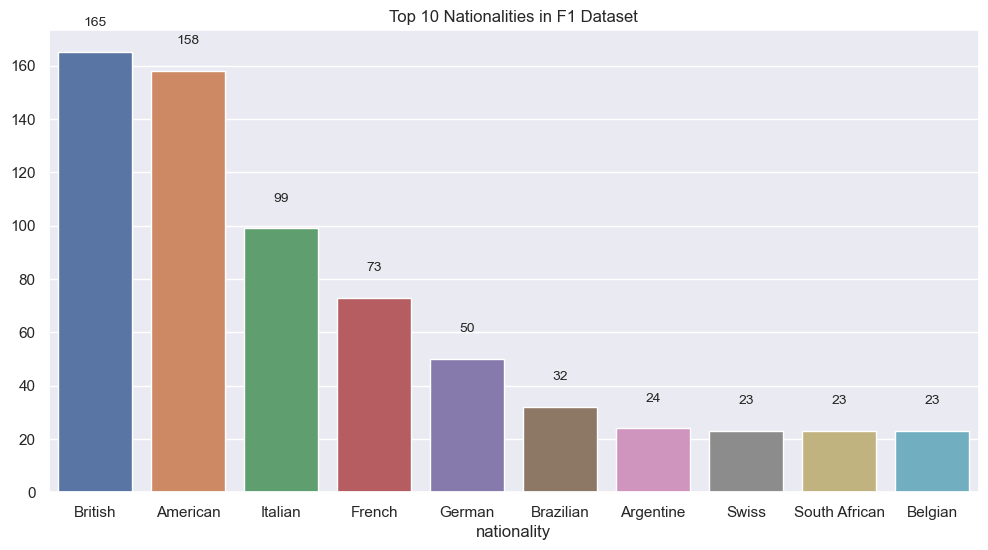

In [13]:
# wizualizacja rozkładu kolumny 'nationality'

nationality_counts = drivers.groupby("nationality").size()
sorted_nationalities = nationality_counts.sort_values(ascending=False)
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=sorted_nationalities.index[:10], y=sorted_nationalities.values[:10])
ax.set_title("Top 10 Nationalities in F1 Dataset")


for i, v in enumerate(sorted_nationalities.values[:10]):
    ax.text(i, v + 10, str(v), ha='center', fontsize=10)


plt.show()

In [14]:
drivers['nationality'].value_counts().head(10)


British          165
American         158
Italian           99
French            73
German            50
Brazilian         32
Argentine         24
Belgian           23
Swiss             23
South African     23
Name: nationality, dtype: int64

In [15]:
counts = races['circuitId'].value_counts()
circuits_freq = pd.DataFrame({'circuitId': counts.index, 'number of times': counts.values})
circuits_freq #most used circuts in order

,circuitId,number of times
0,14,73
1,6,69
2,9,58
3,13,56
4,7,42
...,...,...
72,60,1
73,57,1
74,31,1
75,54,1


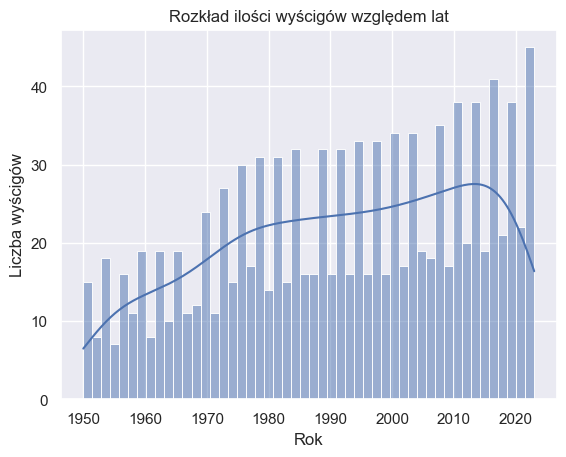

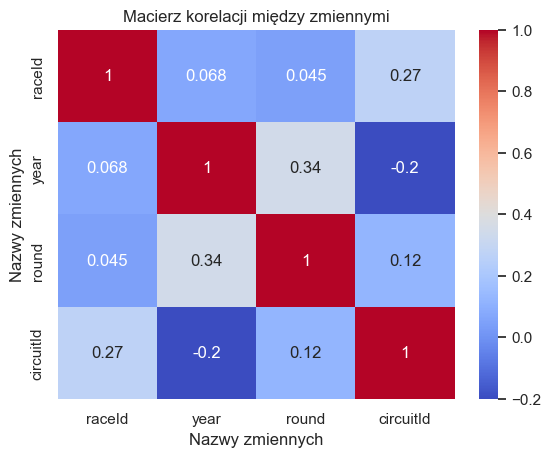

In [16]:
sns.histplot(races['year'], kde=True, bins=50)
plt.title('Rozkład ilości wyścigów względem lat')
plt.xlabel('Rok')
plt.ylabel('Liczba wyścigów')
plt.show()

sns.heatmap(races.corr(), annot=True, cmap='coolwarm')
plt.title('Macierz korelacji między zmiennymi')
plt.xlabel('Nazwy zmiennych')
plt.ylabel('Nazwy zmiennych')
plt.show()

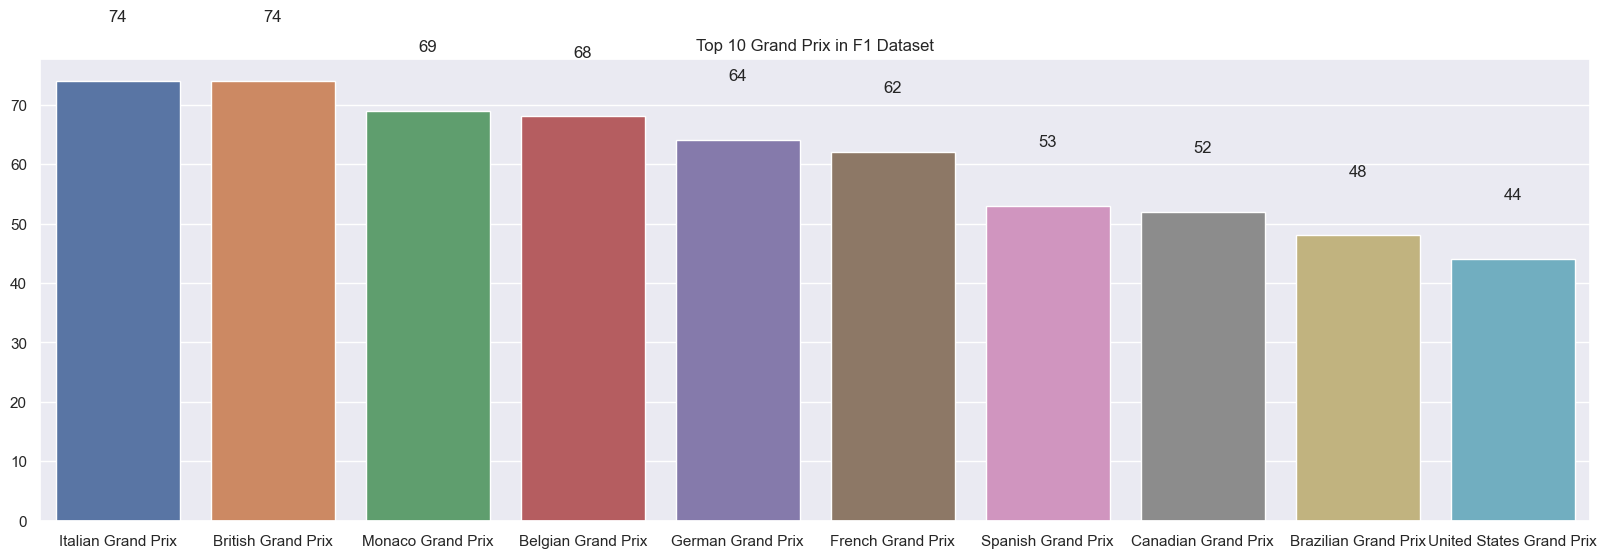

In [17]:
top10GP = races['name_race'].value_counts()[:10]

sns.set(style="darkgrid")
plt.figure(figsize=(20, 6))
ax = sns.barplot(x=top10GP.index, y=top10GP.values)
ax.set_title("Top 10 Grand Prix in F1 Dataset")


for i, v in enumerate(top10GP.values):
    ax.text(i, v + 10, str(v), ha='center', fontsize=12)


plt.show()

In [18]:
#barplot of top 10 constructors

sb.barplot (data = top10constructors, y = 'constructor_name', x = 'positionOrder',
         color = 'red', alpha = 0.8, linewidth=.8, edgecolor="black")
plt. title( 'Top 10 Most GP wins for constructors')
plt.ylabel( 'Constructors Name ')
plt.xlabel('Number of GP wins')

NameError: name 'sb' is not defined

In [19]:
results['positionText'].value_counts().head(10)

R    8805
F    1368
3    1089
4    1089
2    1087
5    1085
1    1082
6    1078
7    1058
8    1030
Name: positionText, dtype: int64

In [20]:
# Zliczenie statusów i wyświetlenie 10 najczęściej występujących
status_counts = results['status'].value_counts().head(10)
status_counts

Finished           7083
+1 Lap             3850
Engine             2011
+2 Laps            1593
Accident           1044
Did not qualify    1025
Collision           833
Gearbox             805
Spun off            792
+3 Laps             731
Name: status, dtype: int64

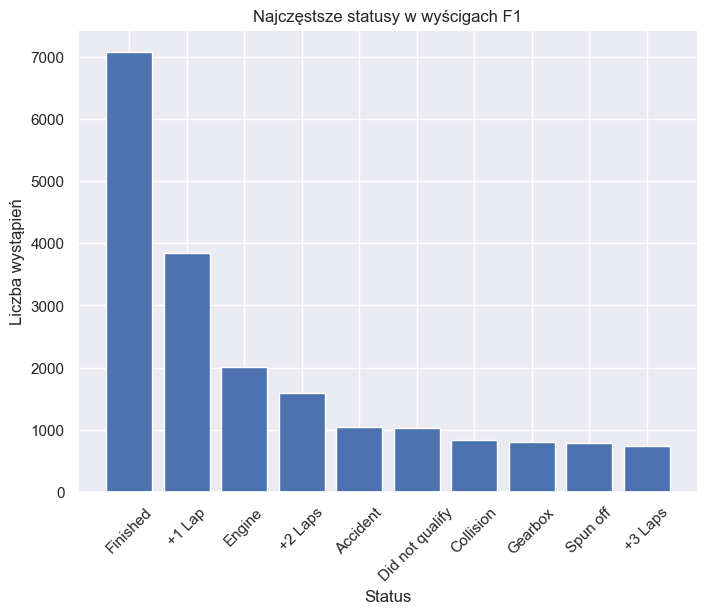

In [21]:
# Stworzenie wykresu słupkowego
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(status_counts.index, status_counts.values)

ax.set_title('Najczęstsze statusy w wyścigach F1')
ax.set_xlabel('Status')
ax.set_ylabel('Liczba wystąpień')
plt.xticks(rotation=45)# Obrócenie etykiet

plt.show()


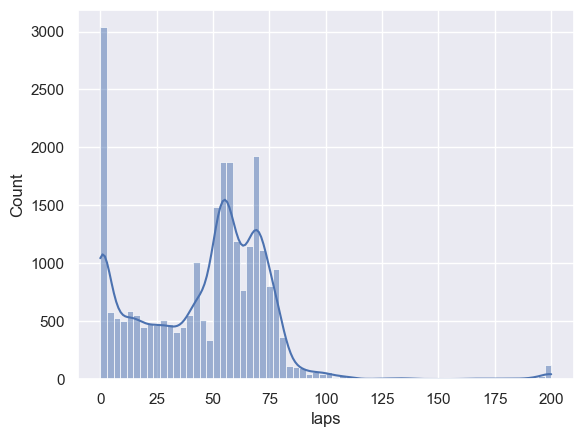

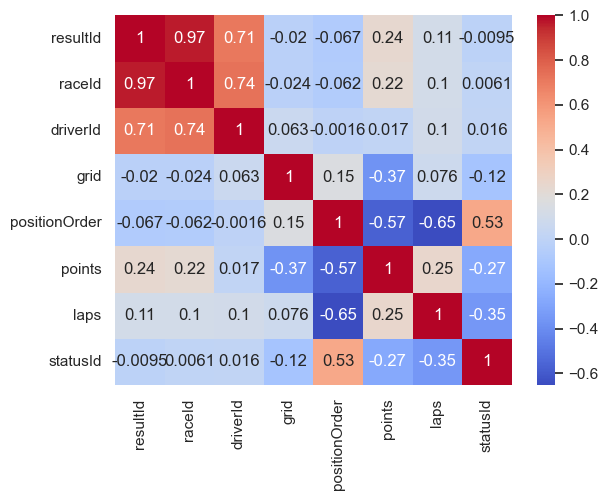

In [22]:
# wizualizacja rozkładu kolumny 'lat'
sns.histplot(results['laps'], kde=True)
plt.show()

# wyświetlenie macierzy korelacji między zmiennymi
sns.heatmap(results.corr(), annot=True, cmap='coolwarm')
plt.show()

In [23]:
driver_standings

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0
...,...,...,...,...,...,...,...
33897,71841,1098,840,0.0,16,16,0
33898,71842,1098,852,0.0,17,17,0
33899,71843,1098,830,0.0,18,18,0
33900,71844,1098,856,0.0,19,19,0


In [24]:

circuits_info = circuits.info()
drivers_info = drivers.info()
driver_stnd_info = driver_standings.info()
races_info = races.info()
results_info = results.info()
status_info = status.info()

# łączenie wyników
result_info = pd.concat([circuits_info, drivers_info, driver_stnd_info, races_info, results_info, status_info]) 

# wyświetlenie wyników
result_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   circuitId  77 non-null     int64 
 1   name       77 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     857 non-null    int64 
 1   driverRef    857 non-null    object
 2   number       857 non-null    object
 3   forename     857 non-null    object
 4   surname      857 non-null    object
 5   dob          857 non-null    object
 6   nationality  857 non-null    object
dtypes: int64(1), object(6)
memory usage: 47.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33902 entries, 0 to 33901
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------ 

ValueError: All objects passed were None

In [25]:
circuits_dscr = circuits.describe()
drivers_dscr = drivers.describe()
driver_stnd_dscr = driver_standings.describe()
races_dscr = races.describe()
results_dscr = results.describe()
status_dscr = status.describe()

result_describe = pd.concat([circuits_dscr, drivers_dscr, driver_stnd_dscr, races_dscr, results_dscr, status_dscr])

result_describe.round(2)


,circuitId,driverId,driverStandingsId,raceId,points,position,wins,year,round,resultId,grid,positionOrder,laps,statusId
count,77.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,39.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,23.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,20.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,40.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,59.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,80.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
count,NaN,857.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,429.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# lista plików w folderze z danymi
files = os.listdir(data_path)

# iteracja po każdym pliku, łączenie i czyszczenie danych
dfs = []
for file in files:
    if file.endswith('.csv'): # tylko pliki CSV
        df = pd.read_csv(os.path.join(data_path, file))
        dfs.append(df)
merged_df = pd.concat(dfs, ignore_index=True)
merged_df.drop_duplicates(inplace=True) # usuwanie duplikatów
merged_df.dropna(inplace=True) # usuwanie brakujących wartości
merged_df.drop(columns=['url', 'location', 'circuitRef', 'country', 'lat', 'lng', 'alt', 'code', 'time',
       'fastestLap', 'rank', 'fastestLapTime', 'fastestLapSpeed' ], inplace=True) # usuwanie niepotrzebnych kolumn


# lista plików w folderze z danymi
files = os.listdir(data)

# iteracja po każdym pliku i czyszczenie danych
for file in files:
    if file.endswith('.csv'): # tylko pliki CSV
        df = pd.read_csv(os.path.join(data, file))
        
        df.drop_duplicates(inplace=True) # usuwanie duplikatów
        df.dropna(inplace=True) # usuwanie brakujących wartości
        df.drop(columns=['url'], inplace=True) # usuwanie kolumny z linkami do wikipedii

        output_file = os.path.join(data, 'cleaned_' + file)  # zapisanie zmodyfikowanej ramki do pliku
        df.to_csv(output_file, index=False)

In [27]:
nazwisko = input("Wprowadź nazwisko kierowcy, którego ID chcesz znaleźć: ")

kierowcaId = ""

for i, driver in results.iterrows():
    if driver['surname'].lower() == nazwisko.lower():
        kierowcaId = driver['driverId']
        kierowcaDOB = driver['dob']
        break

if kierowcaId:
    print(f"ID kierowcy o nazwisku {nazwisko} to {kierowcaId}")
else:
    print(f"Nie znaleziono kierowcy o nazwisku {nazwisko}")

ID kierowcy o nazwisku alonso to 4


In [28]:
from datetime import datetime

today = datetime.today()
birthdate = datetime.strptime(kierowcaDOB, '%Y-%m-%d')
age = today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))

print(age)

41


In [29]:
# policzenie ile razy wybrany kierowca wygrał wyscig

licznik = 0
for index, row in results.iterrows():
    if row['driverId'] == kierowcaId and row['position'] == "1":
        licznik += 1

print(f'Ilość wystąpień sytuacji: {licznik}')

Ilość wystąpień sytuacji: 32


In [30]:
# pobranie daty pierwszej wygranej kierowcy
dfw = pd.to_datetime('2023-05-05') # data bazowa

for index, row in results.iterrows():
    if row['driverId'] == kierowcaId and row['position'] == "1":
        race_id = row['raceId']
        race_date = races.loc[races['raceId'] == race_id, 'date'].values[0]
        race_date = pd.to_datetime(race_date)
        if race_date < dfw:
            dfw = race_date
            
print(f'Data pierwszej wygranej kierowcy: {dfw.date()}')

Data pierwszej wygranej kierowcy: 2003-08-24
